In [9]:
import math
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'serif'



In [10]:
#PDF OF Normal Random


In [11]:
def dN(x, mu, sigma):
    z = (x-mu)/sigma
    pdf = np.exp(0.5 * z ** 2) / math.sqrt(2 * math.pi * sigma ** 2)
    return pdf

In [12]:
# Simulate a Number of Years of Daily Stock Quotes
def simulate_gbm():
    S0= 100.0
    T = 10.0
    r = 0.05
    vol = 0.2
    
    np.random.seed(250000)
    gbm_dates = pd.DatetimeIndex(start='30-09-2004', end='30-09-2014', freq='B')
    
    M = len(gbm_dates)
    I = 1
    dt = 1/252
    df = math.exp(-r * dt) # discount factor
    
    #stock path
    rand = np.random.standard_normal((M, I))
    S = np.zeros_like(rand)
    S[0] = S0
    
    for t in range(1, M):
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * rand[t] * math.sqrt(dt))
    
    gbm = pd.DataFrame(S[:, 0], index=gbm_dates, columns=['index'])
    gbm['returns'] = np.log(gbm['index'] /gbm['index'].shift(1))
    
    gbm['rea_var'] = 252 * np.cumsum(gbm['returns'] ** 2)/ np.arange(len(gbm))
    gbm['rea_vol'] = np.sqrt(gbm['rea_var'])
    gbm = gbm.dropna()
    return gbm


In [13]:
def print_statistics(data):
    print ("Return Sample Statistics")
    print ("---------------------------------------------------------")
    print ("Mean of Daily Log Return   %9.6f" %np.mean(data['returns']))
    print ("Std  of Daily Log Return   %9.6f" %np.std(data['returns']))
    print ("Mean of Annual Log Return  %9.6f" %(np.std(data['returns']) * 252))
    print ("Std  of Annual Log Return  %9.6f" %(np.std(data['returns']) * math.sqrt(252)))
    print ("---------------------------------------------------------")
    print ("Skew of Sample Log Returns %9.6f" %scs.skew(data['returns']))
    print ("Skew Normal Test p-value   %9.6f" %scs.skewtest(data['returns'])[1])
    print ("---------------------------------------------------------")
    print ("Kurt of Sample Log Returns %9.6f" %scs.kurtosis(data['returns']))
    print ("Kurt Normal Test p-value   %9.6f" %scs.kurtosistest(data['returns'])[1])
    print ("---------------------------------------------------------")
    print ("Normal Test p-value        %9.6f" %scs.normaltest(data['returns'])[1])
    print ("---------------------------------------------------------")
    print ("Realised Volatility        %9.6f" %data['rea_vol'].iloc[-1])
    print ("Realised Variance          %9.6f" %data['rea_var'].iloc[-1])

In [14]:
gbm = simulate_gbm()
print_statistics(gbm)

Return Sample Statistics
---------------------------------------------------------
Mean of Daily Log Return    0.000073
Std  of Daily Log Return    0.012721
Mean of Annual Log Return   3.205757
Std  of Annual Log Return   0.201944
---------------------------------------------------------
Skew of Sample Log Returns -0.016447
Skew Normal Test p-value    0.730950
---------------------------------------------------------
Kurt of Sample Log Returns  0.120578
Kurt Normal Test p-value    0.206628
---------------------------------------------------------
Normal Test p-value         0.424617
---------------------------------------------------------
Realised Volatility         0.201947
Realised Variance           0.040783


In [21]:
def quotes_return(data):
    plt.figure(figsize=(9,6))
    plt.subplot(211)
    data['index'].plot()
    plt.ylabel('daily quotes')
    plt.grid(True)
    plt.axis('tight')
    
    plt.subplot(212)
    data['returns'].plot()
    plt.ylabel('daily log returns')
    plt.grid(True)
    plt.axis('tight')
    

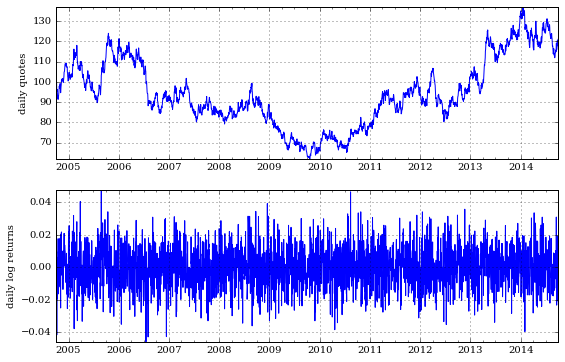

In [22]:
quotes_return(gbm)

In [45]:
def return_histogram(data):
    plt.figure(figsize=(9,5))
    x = np.linspace(min(data['returns']), max(data['returns']), 100)
    plt.hist(np.array(data['returns']), bins=50, normed=True)
    y = dN(x, np.mean(data['returns']), np.std(data['returns']))
    #plt.plot(x, y, linewidth=2)
    plt.xlabel('log returns')
    plt.ylabel('frequency/probablity')
    plt.grid(True)

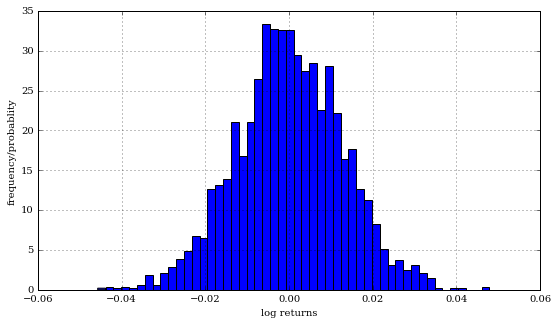

In [46]:
return_histogram(gbm)

In [49]:
def rolling_statistics(data):
    plt.figure(figsize=(11,8))
    plt.subplot(311)
    mr =pd.rolling_mean(data['returns'], 252)*252
    mr.plot()
    plt.grid(True)
    plt.ylabel('returns (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)
    
    plt.subplot(312)
    vo=pd.rolling_std(data['returns'], 252)* math.sqrt(252)
    vo.plot()
    plt.grid(True)
    plt.ylabel('volatility (252d)')
    plt.axhline(mr.mean(), color='r', ls='dashed', lw=1.5)
    vx = plt.axis()
    
    plt.subplot(313)
    co = pd.rolling_corr(mr, vo, 252)
    co.plot()
    plt.grid(True)
    plt.ylabel('correlation (252d)')
    cx=plt.axis()
    plt.axis([vx[0], vx[1], cx[2], cx[3]])
    plt.axhline(co.mean(), color='r', ls='dashed', lw=1.5)

/Users/anandvishnu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=252).mean()
/Users/anandvishnu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=252).std()
/Users/anandvishnu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)


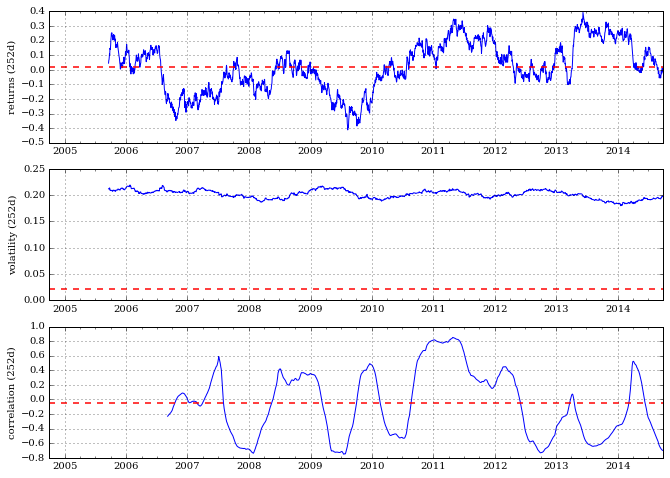

In [50]:
rolling_statistics(gbm)